## Matematicas Especiales 2024
### Programa Final

Este es un programa para resolver ecuaciones diferenciales mediante el metodo de la tranformada de Laplace

Hecho por Tomas Di Leo en Python 3


Primero importamos la libreria SYMPY para trabajar con simbolos y espresiones LATEX

In [224]:
from sympy import *

### Simbolos
>Defino *t* y *s* como simbolos para que el programa los trate como variables.<br>
Defino *y* como una funcion.<br>
Defino *Y* como la transformada de laplace de dicha funcion. Esto nos va a ayudar luego para resolver

In [225]:
t, s = symbols("t, s")
y = Function("y")
Y = laplace_transform(y(t), t, s, noconds=True)

### Ecuacion Diferencial

>Defino eq la ecuacion diferencial siendo:<br>

- *y(t)* la funcion
- *y(t).diff(t)* la funcion derivada respecto a t, o *y'*
- *y(t).diff(t, t)* la funcion derivada dos veces respecto a t, o *y''*

Las dos partes de la ecuacion estan separadas por una coma en dos lineas de la siguiente manera<br>
___
```python
Eq(
    PARTE_IZQUIERDA, 
    PARTE_DERECHA
)
```
___
Equivalente a:
___
$PARTE\_IZQUIERDA = PARTE\_DERECHA$


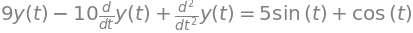

In [226]:
eq = Eq(
    y(t).diff(t, t) - 10 * y(t).diff(t) + 9 * y(t),
    5 * sin(t) + cos(t)
)

eq
#ECUACION DIFERENCIAL

### Condiciones Iniciales
Defino las condiciones iniciales siendo 

- *y(0)* la funcion evaluada en 0
- *y(t).diff(t).subs(t, 0)* la primera derivada de la funcion evaluada en 0, o *y''(0)*

In [227]:
initial = {
    y(0):-1,
    y(t).diff(t).subs(t, 0):2
}

### Aplicar la transformada de Laplace
Defino la ecuacion como *eq_s* aplicando la tranformada de laplace y note:

- La seccion izquierda es la que lleva las funciones y se les aplica las condiciones iniciales con la funcion "subs"
- La siguiente seccion esta separada en otra linea por una coma de la misma manera que se define la ecuacion diferencial
- La tabla de transformadas forman parte de la funcion *laplace_transform()* y existen en la libreria SYMPY


In [228]:
eq_s = Eq(
    laplace_transform(eq.lhs, t,  s, noconds=True).subs(initial),
    laplace_transform(eq.rhs, t,  s, noconds=True)
)

### Resolucion de la ecuacion transformada
Resuelvo la ecuacion antes definida como *eq_s* para *Y* (la tranformada de la funcion que queremos hallar)

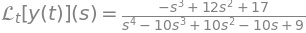

In [229]:
solved = solve(eq_s, Y)[0]
Eq(
    Y,
    solved
)

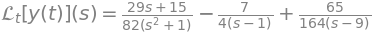

In [230]:
Eq(
    Y,
    solved.apart()
)

### Antitransformada
Defino f, la transformada inversa y completo la solucion definiendo la ecuacion final

In [231]:
f = inverse_laplace_transform(apart(solved), s, t)
solucion = collect(f.expand(), Heaviside(t))/Heaviside(t)

ecuacion_final = Eq(
    y(t),
    solucion
)

**El resultado final**

In [232]:
ecuacion_final